<a href="https://colab.research.google.com/github/CesarAguilardL/Proyectos-Analisis-de-Datos/blob/main/Copia_de_Tarea_Redes_Neuronales_ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Cargar y explorar los datos
df = pd.read_csv('train.csv')  
image_dir = '/content/drive/MyDrive/Imagenes plantas/train_images'  # Directorio imágenes de entrenamiento

In [ ]:
df

,image,labels
0,800113bb65efe69e.jpg,healthy
1,8002cb321f8bfcdf.jpg,scab frog_eye_leaf_spot complex
2,80070f7fb5e2ccaa.jpg,scab
3,80077517781fb94f.jpg,scab
4,800cbf0ff87721f8.jpg,complex
...,...,...
18627,fffb900a92289a33.jpg,healthy
18628,fffc488fa4c0e80c.jpg,scab
18629,fffc94e092a59086.jpg,rust
18630,fffe105cf6808292.jpg,scab frog_eye_leaf_spot


In [ ]:
df=df.set_index=df['labels']

In [ ]:
df

0                                healthy
1        scab frog_eye_leaf_spot complex
2                                   scab
3                                   scab
4                                complex
                      ...               
18627                            healthy
18628                               scab
18629                               rust
18630            scab frog_eye_leaf_spot
18631                            healthy
Name: labels, Length: 18632, dtype: object

In [ ]:
ih, iw = 4000, 2500  # tamano de la imagen
input_shape = (ih, iw, 3)  # forma de la imagen: alto ancho y numero de canales RGB

train_dir = '/content/drive/MyDrive/Imagenes plantas/train_images'  # directorio de entrenamiento
test_dir = '/content/drive/MyDrive/Imagenes plantas/test_images'  # directorio de prueba

num_class = 12  # cuantas clases #porque una es perro y la otra gato
epochs = 30  # cuantas veces entrenar. En cada epoch hace una mejora en los parametros

batch_size = 50  # batch para hacer cada entrenamiento. Lee 50 'batch_size' imagenes antes de actualizar los parametros. Las carga a memoria
num_train = 1200  # numero de imagenes en train
num_test = 1000  # numero de imagenes en test

epoch_steps = num_train // batch_size
test_steps = num_test // batch_size


gentrain = ImageDataGenerator(rescale=1. / 255.) #indica que reescale cada canal con valor entre 0 y 1.


gentrain = ImageDataGenerator(rescale=1. / 255.)  # indica que reescale cada canal con valor entre 0 y 1.

train_generator = gentrain.flow_from_directory(train_dir,
                    batch_size=batch_size,
                    target_size=(iw, ih),
                    class_mode='binary')

gentest = ImageDataGenerator(rescale=1. / 255)

test_generator = gentest.flow_from_directory(test_dir,
                    batch_size=batch_size,
                    target_size=(iw, ih),
                    class_mode='binary')

FileNotFoundError: ignored

In [ ]:
# Preprocesamiento de datos
label_encoder = LabelEncoder()
df['labels'] = label_encoder.fit_transform(df['labels'])
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Construir generadores de datos
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=image_dir,
    x_col='image',
    y_col='labels',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
val_generator = train_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=image_dir,
    x_col='image',
    y_col='labels',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Construir el modelo de red neuronal
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(12, activation='softmax')
])

# Compilar y entrenar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=10, validation_data=val_generator)

# Evaluar el modelo
test_df = pd.read_csv('test.csv')  # Reemplaza 'test.csv' con el nombre de tu archivo de datos de prueba
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=image_dir,
    x_col='image',
    y_col=None,
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,
    shuffle=False
)
predictions = model.predict(test_generator)

# Realizar predicciones en nuevos datos
# Reemplaza 'new_image.jpg' con la ruta de tu nueva imagen
new_image = keras.preprocessing.image.load_img('new_image.jpg', target_size=(224, 224))
new_image = keras.preprocessing.image.img_to_array(new_image)
new_image = np.expand_dims(new_image, axis=0)
new_image = new_image / 255.0
prediction = model.predict(new_image)
predicted_class = label_encoder.inverse_transform(np.argmax(prediction))

print("La enfermedad identificada en la nueva imagen es:", predicted_class)


TypeError: ignored

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [3]:
# Cargar el conjunto de datos
data = pd.read_csv('creditcard.csv')

In [4]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138718,82808,-0.479350,0.291742,1.176496,-2.387149,0.225763,-0.140455,0.213530,0.038732,1.374953,...,0.065243,0.643628,-0.471645,-0.887663,0.300513,0.130897,0.391198,0.181765,1.00,0.0
138719,82808,-8.136440,-11.620969,2.567281,3.847285,8.302748,-6.405774,-6.552874,0.728037,-0.355693,...,0.803246,-0.551467,2.380975,0.282518,0.757671,0.031566,-0.484876,0.107559,283.50,0.0
138720,82809,-0.643764,0.426174,2.199543,0.079840,-0.034291,0.720443,-0.053732,0.530447,0.299450,...,0.101108,0.364598,-0.115569,-0.340284,-0.359793,-0.570781,0.183763,0.140580,9.99,0.0
138721,82809,1.103198,-0.516509,1.043418,0.702689,-1.292794,-0.381240,-0.631045,-0.004531,-0.856200,...,-0.140908,0.002740,0.050943,0.570334,0.227712,-0.309811,0.076024,0.051107,72.00,0.0


In [5]:
# Preprocesamiento de datos
scaler = StandardScaler()
data['normalizedAmount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time', 'Amount'], axis=1)

In [6]:
# Dividir el conjunto de datos en características y etiquetas
X = data.drop('Class', axis=1).values
y = data['Class'].values

In [7]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Construir el modelo de red neuronal
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [9]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
3469/3469 [==============================] - 7s 2ms/step - loss: nan - accuracy: 0.9892
Epoch 2/20
3469/3469 [==============================] - 7s 2ms/step - loss: nan - accuracy: 0.9981
Epoch 3/20
3469/3469 [==============================] - 6s 2ms/step - loss: nan - accuracy: 0.9981
Epoch 4/20
3469/3469 [==============================] - 8s 2ms/step - loss: nan - accuracy: 0.9981
Epoch 5/20
3469/3469 [==============================] - 6s 2ms/step - loss: nan - accuracy: 0.9981
Epoch 6/20
3469/3469 [==============================] - 8s 2ms/step - loss: nan - accuracy: 0.9981
Epoch 7/20
3469/3469 [==============================] - 6s 2ms/step - loss: nan - accuracy: 0.9981
Epoch 8/20
3469/3469 [==============================] - 7s 2ms/step - loss: nan - accuracy: 0.9981
Epoch 9/20
3469/3469 [==============================] - 6s 2ms/step - loss: nan - accuracy: 0.9981
Epoch 10/20
3469/3469 [==============================] - 8s 2ms/step - loss: nan - accuracy: 0.9981
Epoch 11/

In [10]:
# Evaluar el modelo en el conjunto de prueba
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f%%' % (accuracy * 100))

Accuracy: 99.80%


In [11]:
import pandas as pd
import numpy as np

# Cargar el conjunto de datos
data = pd.read_csv('creditcard.csv')

# Explorar los datos
print(data.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

0    284315
1       492
Name: Class, dtype: int64


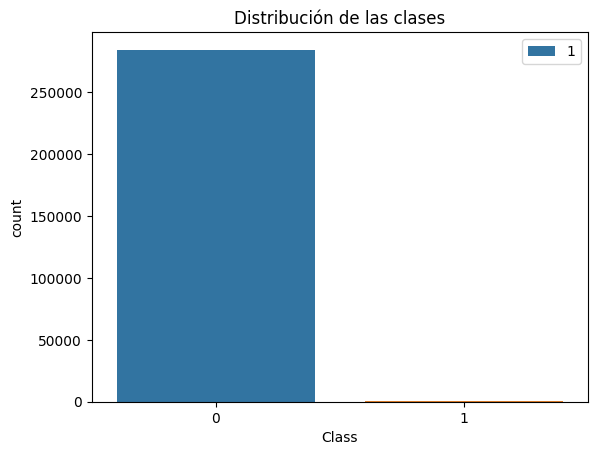

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar la distribución de las clases
print(data['Class'].value_counts())

# Graficar la distribución de las clases
sns.countplot(data=data, x='Class')
plt.title('Distribución de las clases')
plt.legend('1 en caso de fraude y 0 en caso contrario')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividir características y etiquetas
X = data.drop('Class', axis=1)
y = data['Class']

# Escalar características
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [17]:
# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [21]:
len(X_train)

256326

In [16]:
from keras.models import Sequential
from keras.layers import Dense

# Construcción del modelo
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu')) #capas de entrada
model.add(Dense(8, activation='relu')) #capas oculta
model.add(Dense(8, activation='relu')) #capas oculta
model.add(Dense(1, activation='sigmoid')) #salida

# Compilación del modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])#mse

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
8011/8011 [==============================] - 20s 2ms/step - loss: 0.0234 - accuracy: 0.9909
Epoch 2/5
8011/8011 [==============================] - 21s 3ms/step - loss: 0.0031 - accuracy: 0.9994
Epoch 3/5
8011/8011 [==============================] - 18s 2ms/step - loss: 0.0030 - accuracy: 0.9994
Epoch 4/5
8011/8011 [==============================] - 18s 2ms/step - loss: 0.0028 - accuracy: 0.9994
Epoch 5/5
8011/8011 [==============================] - 18s 2ms/step - loss: 0.0027 - accuracy: 0.9994


In [18]:
model.evaluate(X_test, y_test)

891/891 [==============================] - 1s 1ms/step - loss: 0.0030 - accuracy: 0.9994


[0.00298501318320632, 0.9994031190872192]

In [19]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 16)                496       
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 8)                 72        
                                                                 
 dense_10 (Dense)            (None, 1)                 9         
                                                                 
Total params: 713
Trainable params: 713
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Evaluación del modelo con los datos de prueba
# Evaluar el modelo en el conjunto de prueba
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f%%' % (accuracy * 100))

Accuracy: 99.94%
